Initial Data Overview:
   GridId                  Toid  GRID_ExactCut_ID Location_ExactCut  \
0    6256  osgb4000000027865913                27          External   
1    6428  osgb4000000027865914                45          External   
2    6600  osgb4000000027865915                74          External   
3    6772  osgb4000000027865916               106          External   
4    6256  osgb4000000027865917                27          External   

  BoroughName_ExactCut  DoT ID  Length (m) Emissions  Year Pollutant  ...  \
0               NonGLA   16001  117.662736       DFT  2016       CO2  ...   
1               NonGLA   16001  504.845737       DFT  2016       CO2  ...   
2               NonGLA   16001  511.909513       DFT  2016       CO2  ...   
3               NonGLA   16001   51.510888       DFT  2016       CO2  ...   
4               NonGLA   16001  114.435065       DFT  2016       CO2  ...   

  Road-Car-Diesel  Road-Car-Electric  Road-LGV-Petrol  Road-LGV-Diesel  \
0      166.33

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.1

Best Parameters for Random Forest: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 10}

Random Forest Evaluation Results:
Mean Squared Error: 0.1279893966344025
Mean Absolute Error: 0.043484220048977215
R2 Score: 0.2239803577269669
Predictions saved to Random Forest_predictions.csv


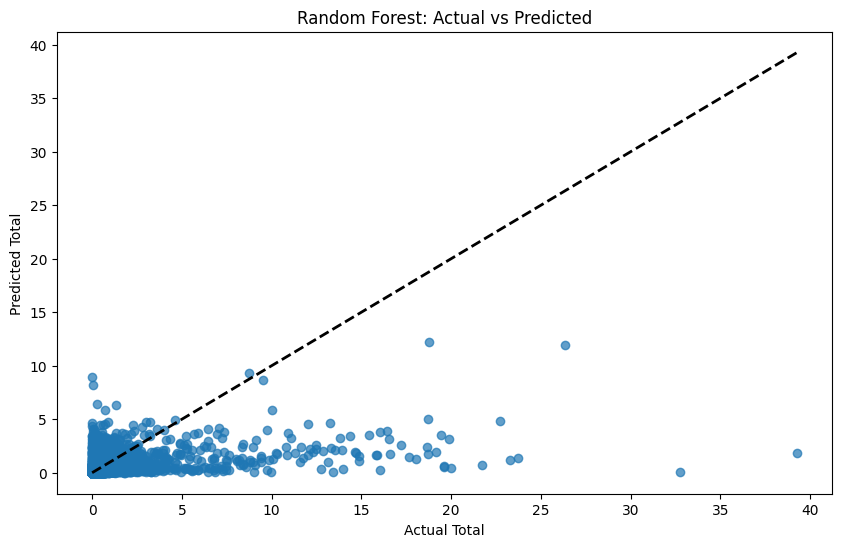


Running RandomizedSearchCV for Decision Tree...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
4 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.1

Best Parameters for Decision Tree: {'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 10}

Decision Tree Evaluation Results:
Mean Squared Error: 0.15241523163983675
Mean Absolute Error: 0.04545374693092461
R2 Score: 0.07588271650375411
Predictions saved to Decision Tree_predictions.csv


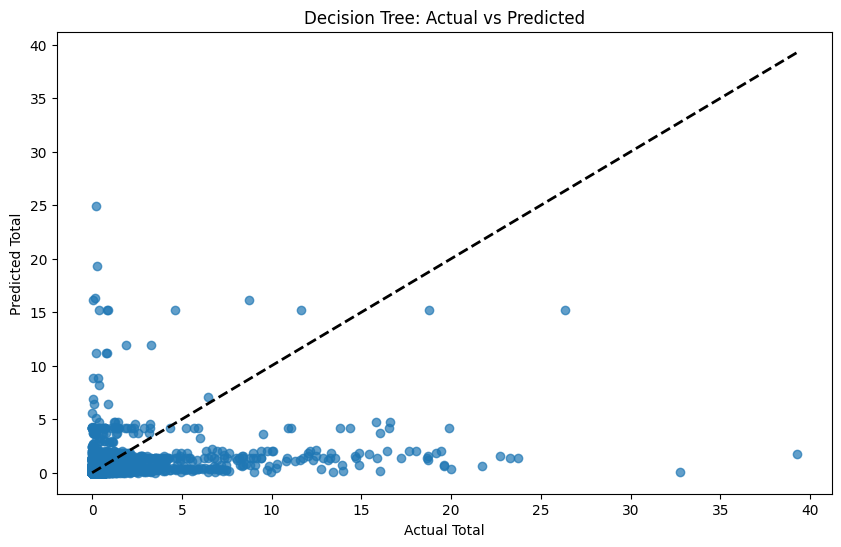


Running RandomizedSearchCV for XGBoost...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters for XGBoost: {'model__subsample': 0.8, 'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}

XGBoost Evaluation Results:
Mean Squared Error: 0.13099175012234499
Mean Absolute Error: 0.04480150987252831
R2 Score: 0.2057766210037948
Predictions saved to XGBoost_predictions.csv


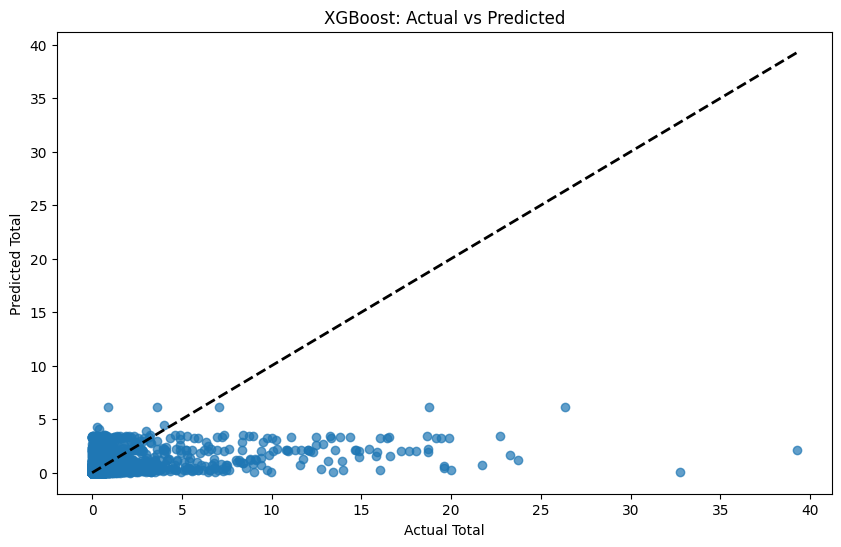


Model Comparison Results:
               Mean Squared Error  Mean Absolute Error  R2 Score
Random Forest            0.127989             0.043484  0.223980
Decision Tree            0.152415             0.045454  0.075883
XGBoost                  0.130992             0.044802  0.205777


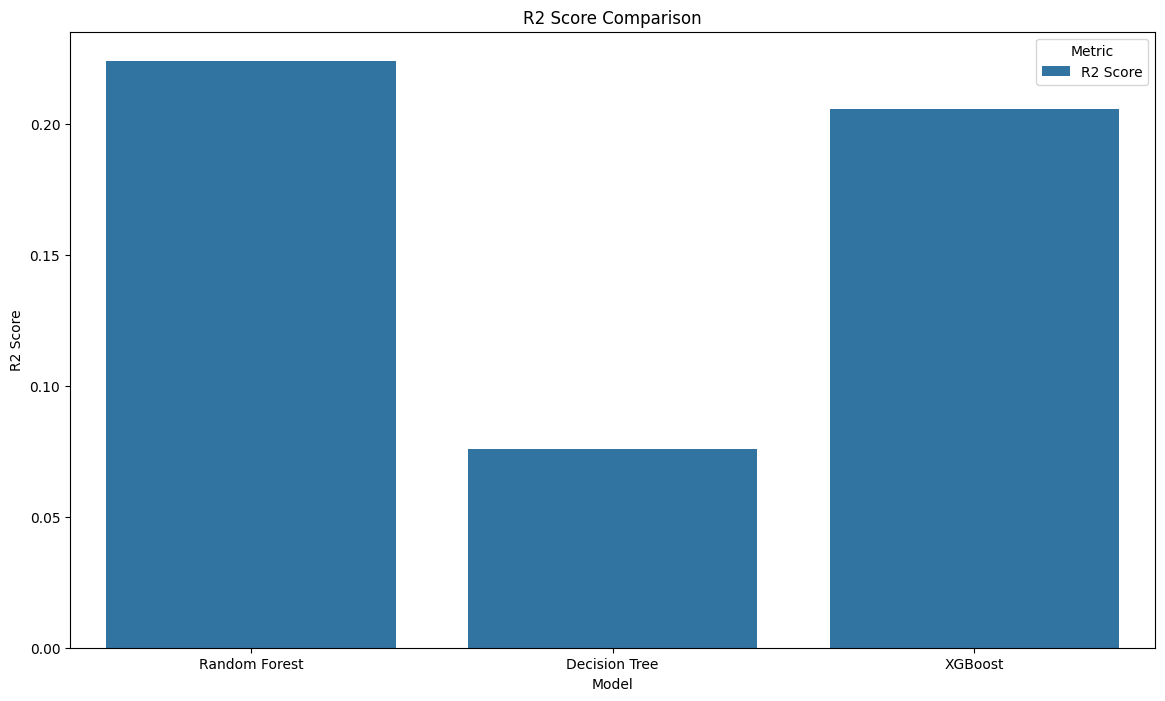

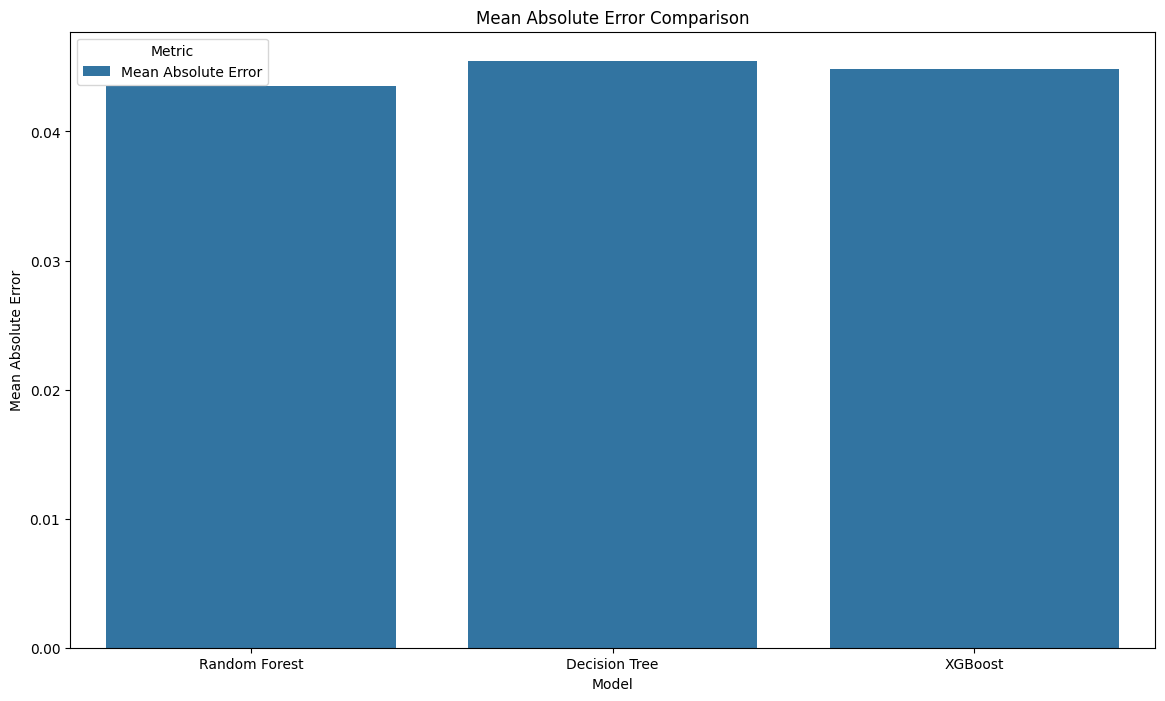

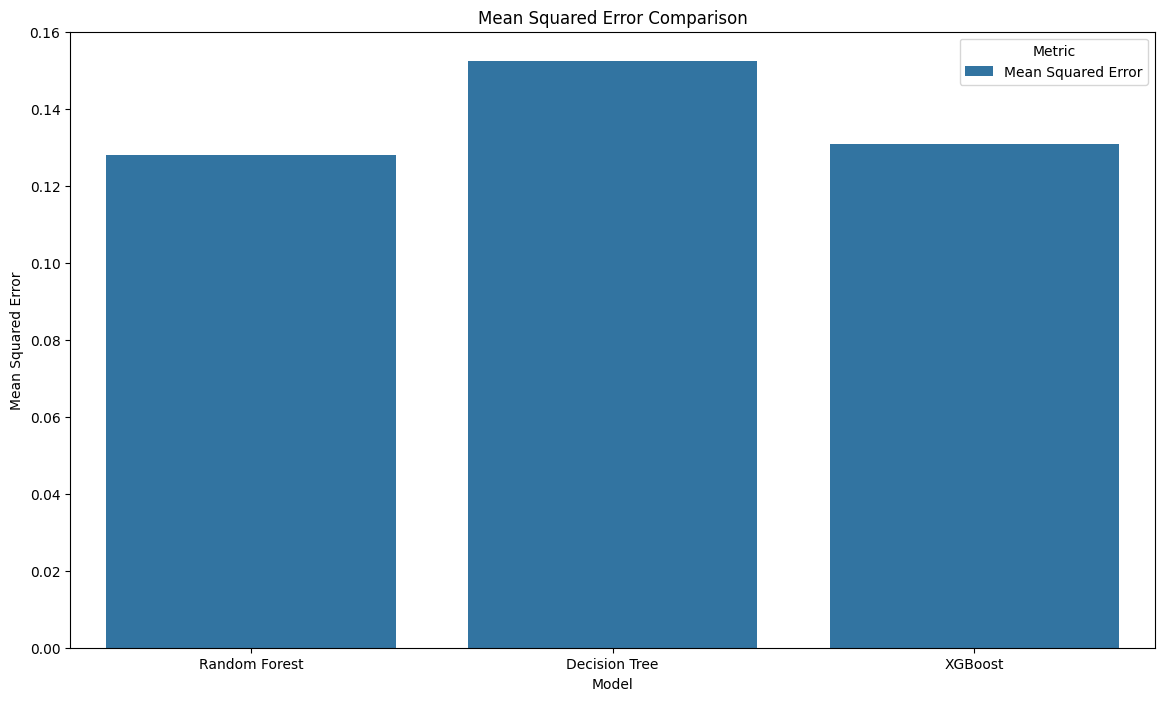


Evaluation metrics saved to Model_Comparison_Evaluation_Metrics.csv


In [3]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Inspect the Data
data = pd.read_excel("/content/drive/MyDrive/dissertation_data/updated_2016_dataset_with_2019_columns.xlsx")  # Replace with your actual file path
print("Initial Data Overview:")
print(data.head())
print(data.info())

# Step 2: Preprocessing
print("\nMissing Values Before Processing:")
print(data.isnull().sum())

# Handle missing values
def handle_missing_values(df):
    # Fill missing numerical values with the mean
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df[col].fillna(df[col].mean(), inplace=True)

    # Fill missing categorical values with the mode
    cat_cols = df.select_dtypes(include=[object]).columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    return df

data = handle_missing_values(data)

print("\nMissing Values After Processing:")
print(data.isnull().sum())

# Convert Year column to integer if it's in float format due to missing value handling
data['Year'] = data['Year'].astype(int)

# Step 3: Define Features and Target
X = data.drop(columns=['Total'])
y = data['Total']

# Define categorical and numerical columns based on updated column names
categorical_features = ['Pollutant', 'Emissions Unit', 'BoroughName_ExactCut']
numerical_features = [
    'Year', 'Road-Motorcycle', 'Road-Car-Taxi', 'Road-Car-Petrol', 'Road-Car-Diesel',
    'Road-Car-Electric', 'Road-LGV-Petrol', 'Road-LGV-Diesel', 'Road-LGV-Electric',
    'Road-Tfl-Bus', 'Road-Non-TfL-Bus-or-Coach', 'Road-HGV-Rigid', 'Road-HGV-Articulated'
]

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['Pollutant'])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert sparse matrices to dense arrays if necessary
X_train_processed = X_train_processed.toarray() if hasattr(X_train_processed, 'toarray') else X_train_processed
X_test_processed = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed

# Define parameter grids for RandomizedSearchCV with fewer parameters and iterations
rf_param_grid = {
    'model__n_estimators': [50, 100],  # Reduced number of trees
    'model__max_depth': [10, 20],  # Reduced depth of trees
    'model__min_samples_split': [2, 5],  # Reduced min samples required to split
    'model__min_samples_leaf': [1, 2],  # Reduced min samples required at leaf node
    'model__max_features': ['auto', 'sqrt']  # Reduced number of features to consider
}

dt_param_grid = {
    'model__max_depth': [10, 20],  # Reduced depth of tree
    'model__min_samples_split': [2, 5],  # Reduced min samples required to split
    'model__min_samples_leaf': [1, 2],  # Reduced min samples required at leaf node
    'model__max_features': ['auto', 'sqrt']  # Reduced number of features to consider
}

xgb_param_grid = {
    'model__n_estimators': [50, 100],  # Reduced number of boosting rounds
    'model__learning_rate': [0.1],  # Reduced step size
    'model__max_depth': [3, 6],  # Reduced maximum depth of a tree
    'model__subsample': [0.8, 0.9],  # Reduced fraction of samples used
    'model__colsample_bytree': [0.8, 0.9]  # Reduced fraction of features used
}

# Define RandomizedSearchCV for each model
def run_randomized_search(model, param_grid, model_name):
    print(f"\nRunning RandomizedSearchCV for {model_name}...")
    random_search = RandomizedSearchCV(
        Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]),
        param_distributions=param_grid,
        n_iter=5,  # Reduced number of parameter settings sampled
        cv=2,  # Reduced number of folds in cross-validation
        scoring='r2',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    print(f"Best Parameters for {model_name}: {random_search.best_params_}")

    # Make predictions
    predictions = best_model.predict(X_test)

    # Check for NaN in predictions
    if np.any(np.isnan(predictions)):
        print(f"Warning: NaN values detected in predictions for {model_name}")

    # Evaluation Metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"\n{model_name} Evaluation Results:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

    # Save evaluation metrics
    evaluation_results[model_name] = [mse, mae, r2]

    # Save predictions
    results_with_predictions = X_test.copy()
    results_with_predictions['Actual_Total'] = y_test
    results_with_predictions['Predicted_Total'] = predictions
    results_with_predictions.to_csv(f'{model_name}_predictions.csv', index=False)
    print(f"Predictions saved to {model_name}_predictions.csv")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.7)
    plt.xlabel('Actual Total')
    plt.ylabel('Predicted Total')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

# Initialize evaluation results dictionary
evaluation_results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
run_randomized_search(rf_model, rf_param_grid, "Random Forest")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
run_randomized_search(dt_model, dt_param_grid, "Decision Tree")

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
run_randomized_search(xgb_model, xgb_param_grid, "XGBoost")

# Step 6: Visualization of Model Comparison Results
# Convert evaluation results to a DataFrame
results_df = pd.DataFrame(evaluation_results, index=['Mean Squared Error', 'Mean Absolute Error', 'R2 Score']).T
print("\nModel Comparison Results:")
print(results_df)

# Melting the DataFrame to long format for Seaborn compatibility
results_melted = results_df.reset_index().melt(id_vars=['index'], var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Model'}, inplace=True)

# Plotting R2 Score Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'R2 Score'])
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.show()

# Plotting Mean Absolute Error Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Mean Absolute Error'])
plt.title('Mean Absolute Error Comparison')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Model')
plt.show()

# Plotting Mean Squared Error Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted[results_melted['Metric'] == 'Mean Squared Error'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.show()

# Save evaluation metrics to CSV
metrics_filename = 'Model_Comparison_Evaluation_Metrics.csv'
results_df.to_csv(metrics_filename)
print(f"\nEvaluation metrics saved to {metrics_filename}")


In [6]:
# Import necessary module for downloading files
from google.colab import files



# Download the predictions CSV
files.download("/content/XGBoost_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
